In [1]:
%load_ext rpy2.ipython

# Problem 1: The Command Line

SSH into your instance. 

You will find a file located at $HOME/not-your-folder/2018_padro_nacionalitat_per_sexe.csv 

Your job is to create a new folder at $HOME/this-is-the-one, and move the csv file into that new folder

# Problem 2: Plotting in R

In [2]:
%%R

library(tidyverse)

/opt/conda/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr

  warnings.warn(x, RRuntimeWarning)
/opt/conda/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Conflicts with tidy packages ---------------------------------------------------

  warnings.warn(x, RRuntimeWarning)
/opt/conda/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: filter(): dplyr, stats
lag():    dplyr, stats

  warnings.warn(x, RRuntimeWarning)


In [3]:
%%R

# Read the file '2018_padro_nacionalitat_per_sexe.csv' from the new location, using read_csv
# put the resulting Tibble into a variable called 'barris'

barris <- read_csv("2018_padro_nacionalitat_per_sexe.csv")

/opt/conda/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Parsed with column specification:
cols(
  Any = col_integer(),
  Codi_Districte = col_integer(),
  Nom_Districte = col_character(),
  Codi_Barri = col_integer(),
  Nom_Barri = col_character(),
  Sexe = col_character(),
  Nacionalitat = col_character(),
  Nombre = col_integer()
)

  warnings.warn(x, RRuntimeWarning)


In [31]:
%%R

# Let's manually convert a few columns into factors. 
barris %>% mutate(Nom_Barri = parse_factor(Nom_Barri, NULL), 
                  Sexe = parse_factor(Sexe, NULL),
                  Nacionalitat = parse_factor(Nacionalitat, NULL))
print(barris[,2:8])

# A tibble: 7,446 x 7
   Codi_Districte Nom_Districte Codi_Barri Nom_Barri  Sexe  Nacionalitat Nombre
            <int> <chr>              <int> <chr>      <chr> <chr>         <int>
 1              1 Ciutat Vella           1 el Raval   Home  Espanya       11732
 2              1 Ciutat Vella           2 el Barri … Home  Espanya        4214
 3              1 Ciutat Vella           3 la Barcel… Home  Espanya        4607
 4              1 Ciutat Vella           4 Sant Pere… Home  Espanya        6235
 5              2 Eixample               5 el Fort P… Home  Espanya       11532
 6              2 Eixample               6 la Sagrad… Home  Espanya       18692
 7              2 Eixample               7 la Dreta … Home  Espanya       15761
 8              2 Eixample               8 l'Antiga … Home  Espanya       15241
 9              2 Eixample               9 la Nova E… Home  Espanya       21884
10              2 Eixample              10 Sant Anto… Home  Espanya       13915
# ... with 7,436 m

In [39]:
%%R

# We want to explore the neighborhood referred to as 'el Poblenou', in the variable
# 'Nom_Barri' (neighborhood name). We will take a look at the gender and nationality
# of the non-Spanish population in this neighborhood. 
#
# First, filter the data to only 'el Poblenou'
# Second, remove the nationality 'Espanya'
# Before that let's look at the data (head command allows us to do this)

poblenou_ns <- barris %>% filter(Nom_Barri=="el Poblenou", Nacionalitat!='Espanya') 
poblenou_ns[,5:8]

# A tibble: 100 x 4
   Nom_Barri   Sexe  Nacionalitat  Nombre
   <chr>       <chr> <chr>          <int>
 1 el Poblenou Home  Itàlia           526
 2 el Poblenou Home  França           235
 3 el Poblenou Home  Regne Unit       190
 4 el Poblenou Home  Rússia            84
 5 el Poblenou Home  Alemanya         138
 6 el Poblenou Home  Romania           37
 7 el Poblenou Home  Ucraïna           42
 8 el Poblenou Home  Portugal          64
 9 el Poblenou Home  Països Baixos     71
10 el Poblenou Home  Polònia           29
# ... with 90 more rows


In [45]:
%%R

# Third, plot a horizontal bar chart of the population counted by 'Nacionalitat',
# but only plot the most populous nationalities. Set a cutoff that looks right to you. 
#
# Note: the number of each 'Sexe'/'Nacionalitat' combo is in the variable 'Nombre'
# 
# Hint: group and count manually, and then use ggplot's geom_col and use coord_flip()
# to make the chart horizontal

plot_data <- poblenou_ns %>% group_by(Nacionalitat, Sexe) %>% summarise(count = sum(Nombre))

plot_data[plot_data$count>100, ]

# A tibble: 17 x 3
# Groups:   Nacionalitat [10]
   Nacionalitat          Sexe  count
   <chr>                 <chr> <int>
 1 Alemanya              Dona    155
 2 Alemanya              Home    138
 3 Brasil                Dona    105
 4 França                Dona    244
 5 França                Home    235
 6 Itàlia                Dona    491
 7 Itàlia                Home    526
 8 Marroc, el            Home    101
 9 Pakistan              Dona    102
10 Pakistan              Home    257
11 Regne Unit            Dona    130
12 Regne Unit            Home    190
13 Resta països d'Europa Dona    187
14 Resta països d'Europa Home    136
15 Rússia                Dona    131
16 Xina                  Dona    205
17 Xina                  Home    190


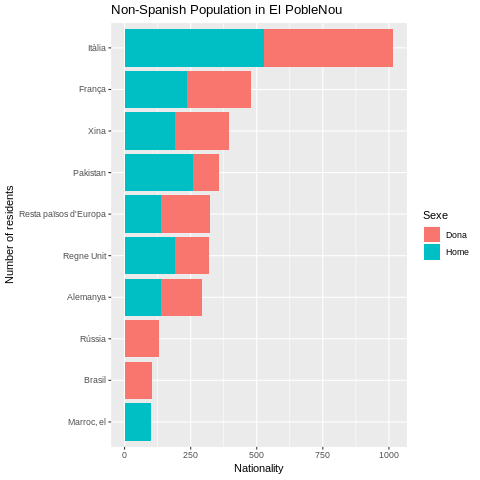

In [52]:
%%R

ggplot(data=plot_data %>% filter(count>99), aes(x = reorder(Nacionalitat, count), y = count, fill = Sexe)) + geom_col() + coord_flip() + ggtitle("Non-Spanish Population in El PobleNou") + xlab("Number of residents") + ylab("Nationality")

# Bonus: Display the gender ('Sexe') in different colors, via the "fill" property!

# Problem 3: Classes in Python

In [57]:
# Create a class called "RandomClassifier". 

class RandomClassifier: 
    def __init__(self, probability):
        self.probability = probability
    
    def predict(self, x):
       return np.random.binomial(size=1, p= self.probability, n=1)

# Its constructor should have one required parameter: 'probability'

# It should have one instance method, 'predict'

# The predict method should take one required parameter: 'x'

# The predict method should then randomly return a 1 or 0. It should return a 1
# with the probability given in the parameter

# The following cell has a test that should pass if you've done it correctly!



In [169]:
import numpy as np

r = RandomClassifier(probability = .2)

m = np.mean([r.predict(x = i) for i in np.arange(100000)])

#numpy.arange([start, ]stop)
#Return evenly spaced values within a given interval.

np.testing.assert_approx_equal(m, 0.2, 2)

#numpy.testing.assert_almost_equal(actual, desired, decimal=[])
#AssertionError If actual and desired are not equal up to specified precision

print(r.probability)
print(m)

0.2
0.19856


# Problem 4: Some Theory

### What are pure functions and what are their strengths? (2-3 lines)

#### A pure function is a function which:
* given the same input, will always return the same output; and
* produces no side effects.

#### Pure functions are good to use, including because: 
* they are completely unaffected by the outside state; and
* they are very independent, making them easy to move around, re-factor and reorganise in your code.

### What is lazy evaluation and when might you use it? (2-3 lines)

#### Lazy evaluation is an evaluation strategy that delays the evaluation of an expression until its value is needed and that avoids repeated evaluations. You might use it to improve performance by avoiding needless calculations and error conditions in evaluating compound expressions.